In [ ]:
import pandas as pd
import numpy as np
import sklearn

**Get the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/for-clustering-users.xlsx", index_col=0)

In [ ]:
df.head(5)

,name,screen_name,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question20,question21,question22,question23,question24,question25,question26,question27,question28,question29,question30,question31,question32,question33,question34,question35,question36,question37,question38,question39,question40,question41,Latitude,Longitude,translated,topics,Preferred_archetype
0,Guadalupee,123ilSE,0,1,0,0,1,0.147083,0.211042,0.168833,0.150292,0.187042,0.044171,0.020499,0.875858,0.003289,0.047788,0.008394,0.6721,Right,Student Loan,"Not at all, i’d rather rent all assets.",Another benefit,Yearly a few times,Less then 1 hour,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Every two weeks,Two to Three Times a Week,Every Year,Banking & Financial Services,I don't have a car,Netherlands,3 - 4 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, levi's, vans",I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Hockey,Hiking,Unemployed,36423,Female,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,1399,Prolific Participant,"English, Dutch, German",Operations,"AirBnB, Walt Disney, Duracell, Virgin, Red Bul...",None,"Books, Clothing & Shoes, Health & Beauty","Instagram, Youtube, Whatsapp","Print (Newspapers & Periodicals), Radio (AM/FM...",52.3246,5.119300,first time on twitter how doess this work lost,"['low', 'origin', 'film', 'paddy', 'seinfuckin...",Leave legacy
1,4M,4MCrypto,2248,122,457,3,1246,0.129500,0.221500,0.143000,0.189500,0.182500,0.035848,0.001670,0.780312,0.001635,0.025637,0.154898,0.9586,Right,Student Loan,"Yes, but in some cases I would consider rental...",A paid job,Every day,1 to 2 hours,Once a Week,3 hours or more,3 hours or more,Less then 1 hour,Monthly,Once a Week,Every Few Years,"Retail, Wholesale & Distribution",I don't have a car,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, two thirds, salomon",I don't drive or have a car,"C, I respond to the content available online,...","Healthcare Insurance, Home Owners Insurance, R...",Swimming,Swimming,Employed part time (1-34 hours per week),34454,Male,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,2611AN,Prolific Participant,"English, Dutch","Marketing, Sales & Business Development","Unicef, Lego, Volvo, IBM, Apple, Porsche","Savings Account, Stock Options","Electronics & Computers, Handmade Products, Sp...","Facebook, Instagram, Twitter","Online News (News Websites, News Apps), Print ...",52.0117,4.359700,free aletop goon x buy approaching signal on h...,"['water', 'sleep', 'solo', 'bah', 'steam', 'fi...",Provide structure
2,Arun Joseph,acid_milkshake,1834,43,276,0,327,0.113000,0.211500,0.068000,0.126500,0.142000,0.457770,0.130685,0.336976,0.007447,0.054606,0.012515,0.7403,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,Every day,1 to 2 hours,Two to Three Times a Week,3 hours or more,3 hours or more,1 to 2 hours,Three days a week,Two to Three Times a Week,Every Year,Software & IT Services,I don't have a car,India,3 - 4 persons,"No, not necessarily, i don't feel that committ...",Smartphone or Tablet,"Tesla, Google, Asus",I don't drive or have a car,"D, I am eager for information and absorb artic...",Life Insurance,Soccer,Cooking,Independent part time (1-34 hours per week),36758,Male,Some college (no degree) Associate's degree,Less then 20.000 EUR,Single,India,560066,Odema Community Member,"English, German",Information Technology,"Unicef, Lego, Volvo, IBM, Apple, Porsche",Mutual Funds,"Books, Clothing & Shoes, Electronics & Compute...","Instagram, Twitter, Linkedin, Youtube, Whatsapp","Online

In [ ]:
df.drop(['name','screen_name', 'translated'], axis=1, inplace=True)
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df.head()

Dimension data: 161 rows and 62 columns


,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question20,question21,question22,question23,question24,question25,question26,question27,question28,question29,question30,question31,question32,question33,question34,question35,question36,question37,question38,question39,question40,question41,Latitude,Longitude,topics,Preferred_archetype
0,0,1,0,0,1,0.147083,0.211042,0.168833,0.150292,0.187042,0.044171,0.020499,0.875858,0.003289,0.047788,0.008394,0.6721,Right,Student Loan,"Not at all, i’d rather rent all assets.",Another benefit,Yearly a few times,Less then 1 hour,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Every two weeks,Two to Three Times a Week,Every Year,Banking & Financial Services,I don't have a car,Netherlands,3 - 4 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, levi's, vans",I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Hockey,Hiking,Unemployed,36423,Female,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,1399,Prolific Participant,"English, Dutch, German",Operations,"AirBnB, Walt Disney, Duracell, Virgin, Red Bul...",None,"Books, Clothing & Shoes, Health & Beauty","Instagram, Youtube, Whatsapp","Print (Newspapers & Periodicals), Radio (AM/FM...",52.3246,5.119300,"['low', 'origin', 'film', 'paddy', 'seinfuckin...",Leave legacy
1,2248,122,457,3,1246,0.129500,0.221500,0.143000,0.189500,0.182500,0.035848,0.001670,0.780312,0.001635,0.025637,0.154898,0.9586,Right,Student Loan,"Yes, but in some cases I would consider rental...",A paid job,Every day,1 to 2 hours,Once a Week,3 hours or more,3 hours or more,Less then 1 hour,Monthly,Once a Week,Every Few Years,"Retail, Wholesale & Distribution",I don't have a car,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, two thirds, salomon",I don't drive or have a car,"C, I respond to the content available online,...","Healthcare Insurance, Home Owners Insurance, R...",Swimming,Swimming,Employed part time (1-34 hours per week),34454,Male,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,2611AN,Prolific Participant,"English, Dutch","Marketing, Sales & Business Development","Unicef, Lego, Volvo, IBM, Apple, Porsche","Savings Account, Stock Options","Electronics & Computers, Handmade Products, Sp...","Facebook, Instagram, Twitter","Online News (News Websites, News Apps), Print ...",52.0117,4.359700,"['water', 'sleep', 'solo', 'bah', 'steam', 'fi...",Provide structure
2,1834,43,276,0,327,0.113000,0.211500,0.068000,0.126500,0.142000,0.457770,0.130685,0.336976,0.007447,0.054606,0.012515,0.7403,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,Every day,1 to 2 hours,Two to Three Times a Week,3 hours or more,3 hours or more,1 to 2 hours,Three days a week,Two to Three Times a Week,Every Year,Software & IT Services,I don't have a car,India,3 - 4 persons,"No, not necessarily, i don't feel that committ...",Smartphone or Tablet,"Tesla, Google, Asus",I don't drive or have a car,"D, I am eager for information and absorb artic...",Life Insurance,Soccer,Cooking,Independent part time (1-34 hours per week),36758,Male,Some college (no degree) Associate's degree,Less then 20.000 EUR,Single,India,560066,Odema Community Member,"English, German",Information Technology,"Unicef, Lego, Volvo, IBM, Apple, Porsche",Mutual Funds,"Books, Clothing & Shoes, Electronics & Compute...","Instagram, Twitter, Linkedin, Youtube, Whatsapp","Online News (News Websites, News Apps), Podcas...",13.2257,77.661150,"['police', 'nigeria', 'european', 'shoot', 'ou...",Provide structure
3,0,2,0,0,7,0.152750,0.250750,0.101250,0.146250,0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   favourites_count     161 non-null    int64  
 1   followers_count      161 non-null    int64  
 2   friends_count        161 non-null    int64  
 3   listed_count         161 non-null    int64  
 4   statuses_count       161 non-null    int64  
 5   Agreeableness        161 non-null    float64
 6   Openness             161 non-null    float64
 7   Neuroticism          161 non-null    float64
 8   Extraversion         161 non-null    float64
 9   Conscientiousness    161 non-null    float64
 10  Angry                161 non-null    float64
 11  Fear                 161 non-null    float64
 12  Joy                  161 non-null    float64
 13  Surprise             161 non-null    float64
 14  Sadness              161 non-null    float64
 15  Love                 161 non-null    flo

**Implementing One-Hot-Encoder**

In [ ]:
new = pd.get_dummies(df)
new

,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question27,Latitude,Longitude,question1_Left,question1_Right,question2_Auto Loans,"question2_Auto Loans, Credit Cards, Home Mortgage","question2_Auto Loans, Credit Cards, Home Mortgage, Student Loan","question2_Auto Loans, Credit Cards, Personal Loan",question2_Business Loan,"question2_Business Loan, Home Mortgage",question2_Credit Cards,"question2_Credit Cards, Home Mortgage","question2_Credit Cards, Home Mortgage, Student Loan","question2_Credit Cards, Personal Loan","question2_Credit Cards, Personal Loan, Student Loan","question2_Credit Cards, Student Loan",question2_Home Mortgage,"question2_Home Mortgage, Personal Loan","question2_Home Mortgage, Student Loan",question2_None,question2_Personal Loan,"question2_Personal Loan, Student Loan",...,"question41_Radio (AM/FM, Internet, Satellite), TV (Late Night Comedy, Other), TV (Local/Cable News Broadcast)","question41_Radio (AM/FM, Internet, Satellite), TV (Late Night Comedy, Other), Word of Mouth","question41_Radio (AM/FM, Internet, Satellite), TV (Local/Cable News Broadcast)",question41_Social Media,"question41_Social Media, TV (Late Night Comedy, Other)","question41_Social Media, TV (Local/Cable News Broadcast), Word of Mouth","question41_Social Media, Word of Mouth",question41_TV (Local/Cable News Broadcast),question41_Word of Mouth,"topics_['chillslow', 'oh', 'ad', 'tiktoks', 'offense', 'doing', 'poorly', 'aleykum', 'steps', 'subscribers', 'athleisure', 'animal', 'valencian', 'doesnt', 'sedition']","topics_['couldnt', 'young', 'science', 'pressure', 'track', 'panicked', 'arresting', 'mohammed', 'sweet', 'brutal', 'station', 'wrap', 'officials', 'fake', 'cavaleiros']","topics_['did', 'advice', 'years', 'anything', 'was', 'man', 'them', 'until', 'fall', 'often', 'idea', 'year', 'played', 'switch', 'cheese']","topics_['escape', 'comments', 'damage', 'shit', 'wed', 'multiple', 'give', 'weekend', 'visit', 'halflife', 'next', 'adhd', 'stop', 'famous', 'staing']","topics_['fact', 'whoever', 'two', 'others', 'studies', 'basic', 'group', 'racism', 'problems', 'vaccination', 'same', 'write', 'cis', 'uk', 'unfortunately']","topics_['here', 'hit', 'blockchain', 'even', 'token', 'future', 'join', 'project', 'serious', 'check', 'dbft', 'ready', 'founder', 'meet', 'our']","topics_['hold', 'racist', 'nazis', 'upgrade', 'songs', 'school', 'shouldnt', 'interview', 'incredible', 'extremist', 'filter', 'video', 'enough', 'star', 'anything']","topics_['hoursto', 'enjoying', 'fast', 'waiting', 'juld', 'pack', 'cosmic', 'ryzen', 'part', 'away', 'next', 'stoch', 'myselfends', 'winning', 'luck']","topics_['illegal', 'cat', 'workout', 'england', 'holiday', 'training', 'hangover', 'canceled', 'lot', 'instagram', 'edition', 'siren', 'overwatch', 'man', 'fear']","topics_['it', 'keep', 'write', 'please', 'take', 'like', 'pandemic', 'racist', 'how', 'shit', 'fine', 'here', 'wait', 'what', 'feel']","topics_['ive', 'wearing', 'making', 'pants', 'sad', 'approa', 'pro', 'publisher', 'stay', 'chair', 'package', 'red', 'citizens', 'folks', 'lucky']","topics_['low', 'origin', 'film', 'paddy', 'seinfuckingfeld', 'flakes', 'ranking', 'correctly', 'vent', 'loveydovey', 'word', 'hmmmm', 'possessions', 'motherboards', 'gumi']","topics_['morning', 'shot', 'research', 'guy', 'every', 'against', 'waiting', 'prison', 'statement', 'internet', 'rotterdam', 'everyonefor', 'radio', 'immigration', 'decisions']","topics_['particularly', 'enunciation', 'background', 'carmen', 'beach', 'vaccinations', 'actively', 'aikel', 'pull', 'parts', 'povey', 'summer', 'hairdresser', 'android', 'road']","topics_['perplexed', 'neusta', 'luffy', 'hmmmm', 'promptly', 'formed', 'knitted', 'akash', 'kyi', 'renowned', 'preppi', 'windbag', 'decoupling', 'powerf', 'chillslow']","topics_['play', 'has', 'phone', 'me', 'doctors', 'now', 'made', 'movie', 'united', '

**Normalizing Dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
norm_df = scaler.fit_transform(new)
norm_df

array([[0.00000000e+00, 2.28602780e-05, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01159191e-02, 2.78895391e-03, 3.05154915e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.25293398e-03, 9.82991953e-04, 1.84294872e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [6.52044784e-03, 7.08668617e-03, 1.49572650e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.64093887e-03, 4.52633504e-03, 8.01282051e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.88998488e-02, 8.34720190e-01, 3.16506410e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

**Automatical K-Mean Clustering**

- finding optimal K-number automatically



In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
which_df = norm_df #use 'new' for dataset without normalisazion, use norm_df for dataset after normalization

cost = []
K = list(range(1,20))
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(which_df) 
    cost.append(kmeans.inertia_)

plt.plot(cost)
print(K)
print(cost)

NameError: ignored

In [ ]:
import math
def calc_distance (x1,y1, a,b,c):
  d = abs(a*x1+b*y1+c)/(math.sqrt(a*a+b*b))
  return d

In [ ]:
a = cost[0]-cost[-1]
b = K[-1] - K[0]
c1 = K[0] * cost[-1]
c2 = K[-1] * cost[0]
c = c1-c2

In [ ]:
distance_of_points_from_line = []
for k in range(len(K)):
  distance_each_point = calc_distance(K[k], cost[k],a,b,c)
  distance_of_points_from_line.append(distance_each_point)

[1.3465266473691104e-14, 2.6397587205892847, 4.008948435275037, 4.372243323437752, 4.235607971177247, 4.249607867488313, 3.7277055844970093, 3.6229385854987077, 3.238737923392286, 2.992374194962282, 2.4947364158280596, 2.487224323481932, 1.776882858230238, 1.7198743767693503, 1.5251747542015357, 1.1660832789589166, 0.7852191350657944, 0.4193092210834447, 1.3465266473691104e-14]


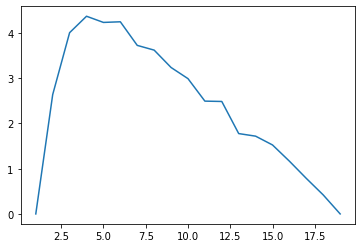

In [ ]:
plt.plot(K, distance_of_points_from_line)
print(distance_of_points_from_line)

In [ ]:
opt_Cost = max(distance_of_points_from_line)
opt_Ind = distance_of_points_from_line.index(opt_Cost)

- Implementing K-Mean Clustering

In [ ]:
kmeans = KMeans(n_clusters=K[opt_Ind]).fit(which_df) 
cluster = kmeans.labels_
cluster

array([0, 0, 0, 2, 1, 0, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 0, 0, 1, 3, 1, 1,
       1, 0, 0, 3, 0, 3, 2, 1, 3, 3, 2, 0, 2, 0, 1, 3, 1, 1, 3, 3, 3, 0,
       1, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 3, 0, 2, 0, 1, 1, 2, 3, 1, 2,
       0, 2, 0, 3, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 3, 3, 0, 0, 1,
       2, 2, 3, 1, 1, 0, 2, 1, 2, 0, 0, 3, 3, 3, 1, 1, 1, 2, 0, 1, 2, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 3, 3, 3, 1, 1, 3, 1, 1, 0, 1, 3, 2,
       0, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 3, 2, 3, 1, 0, 1, 0, 0, 2, 0,
       3, 0, 3, 1, 0, 0, 3], dtype=int32)

**Add to Dataset**

In [ ]:
df['Clusters'] = cluster
df

,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question20,question21,question22,question23,question24,question25,question26,question27,question28,question29,question30,question31,question32,question33,question34,question35,question36,question37,question38,question39,question40,question41,Latitude,Longitude,topics,Preferred_archetype,Clusters
0,0,1,0,0,1,0.147083,0.211042,0.168833,0.150292,0.187042,0.044171,0.020499,0.875858,0.003289,0.047788,0.008394,0.6721,Right,Student Loan,"Not at all, i’d rather rent all assets.",Another benefit,Yearly a few times,Less then 1 hour,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Every two weeks,Two to Three Times a Week,Every Year,Banking & Financial Services,I don't have a car,Netherlands,3 - 4 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, levi's, vans",I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Hockey,Hiking,Unemployed,36423,Female,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,1399,Prolific Participant,"English, Dutch, German",Operations,"AirBnB, Walt Disney, Duracell, Virgin, Red Bul...",None,"Books, Clothing & Shoes, Health & Beauty","Instagram, Youtube, Whatsapp","Print (Newspapers & Periodicals), Radio (AM/FM...",52.32460,5.119300,"['low', 'origin', 'film', 'paddy', 'seinfuckin...",Leave legacy,0
1,2248,122,457,3,1246,0.129500,0.221500,0.143000,0.189500,0.182500,0.035848,0.001670,0.780312,0.001635,0.025637,0.154898,0.9586,Right,Student Loan,"Yes, but in some cases I would consider rental...",A paid job,Every day,1 to 2 hours,Once a Week,3 hours or more,3 hours or more,Less then 1 hour,Monthly,Once a Week,Every Few Years,"Retail, Wholesale & Distribution",I don't have a car,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, two thirds, salomon",I don't drive or have a car,"C, I respond to the content available online,...","Healthcare Insurance, Home Owners Insurance, R...",Swimming,Swimming,Employed part time (1-34 hours per week),34454,Male,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,2611AN,Prolific Participant,"English, Dutch","Marketing, Sales & Business Development","Unicef, Lego, Volvo, IBM, Apple, Porsche","Savings Account, Stock Options","Electronics & Computers, Handmade Products, Sp...","Facebook, Instagram, Twitter","Online News (News Websites, News Apps), Print ...",52.01170,4.359700,"['water', 'sleep', 'solo', 'bah', 'steam', 'fi...",Provide structure,0
2,1834,43,276,0,327,0.113000,0.211500,0.068000,0.126500,0.142000,0.457770,0.130685,0.336976,0.007447,0.054606,0.012515,0.7403,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,Every day,1 to 2 hours,Two to Three Times a Week,3 hours or more,3 hours or more,1 to 2 hours,Three days a week,Two to Three Times a Week,Every Year,Software & IT Services,I don't have a car,India,3 - 4 persons,"No, not necessarily, i don't feel that committ...",Smartphone or Tablet,"Tesla, Google, Asus",I don't drive or have a car,"D, I am eager for information and absorb artic...",Life Insurance,Soccer,Cooking,Independent part time (1-34 hours per week),36758,Male,Some college (no degree) Associate's degree,Less then 20.000 EUR,Single,India,560066,Odema Community Member,"English, German",Information Technology,"Unicef, Lego, Volvo, IBM, Apple, Porsche",Mutual Funds,"Books, Clothing & Shoes, Electronics & Compute...","Instagram, Twitter, Linkedin, Youtube, Whatsapp","Online News (News Websites, News Apps), Podcas...",13.22570,77.661150,"['police', 'nigeria', 'european', 'shoot', 'ou...",Provide structure,0
3,0,2,0,0,7,0.152750,0.250750,0.